In [1]:
%matplotlib inline
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
import collections

import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, RIVERS
import seaborn as sns

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [2]:
domain = xr.open_dataset(os.path.join('/p/work1/gergel/lwe', 
                                      'domain.lnd.wr50a_ar9v4.100920.nc'))

In [3]:
# Large ensemble
swe_hist_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/lens/H2OSNO/historical', '*H2OSNO*'),
                                   concat_dim='ensemble_member')
swe_hist = swe_hist_file['H2OSNO'].sel(time=slice('1976-09-01', '2005-08-31'))

swe_future_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/lens/H2OSNO/future', '*H2OSNO*'),
                                  concat_dim='ensemble_member')
swe_future = swe_future_file['H2OSNO'].sel(time=slice('2070-09-01', '2099-08-31'))

# LWE
swe_1pt5_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/H2OSNO', '*1pt5degC*H2OSNO*'),
                                  concat_dim='ensemble_member')
swe_1pt5 = swe_1pt5_file['H2OSNO'].sel(time=slice('2070-09-01', '2099-08-31'))

swe_2pt0_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/H2OSNO', '*2pt0degC*H2OSNO*'),
                                  concat_dim='ensemble_member')
swe_2pt0 = swe_2pt0_file['H2OSNO'].sel(time=slice('2070-09-01', '2099-08-31'))

In [4]:
swe_hist_mm = swe_hist.groupby('time.month').mean('time').isel(month=3)
swe_future_mm = swe_future.groupby('time.month').mean('time').isel(month=3)
swe_1pt5_mm = swe_1pt5.groupby('time.month').mean('time').isel(month=3)
swe_2pt0_mm = swe_2pt0.groupby('time.month').mean('time').isel(month=3)

/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


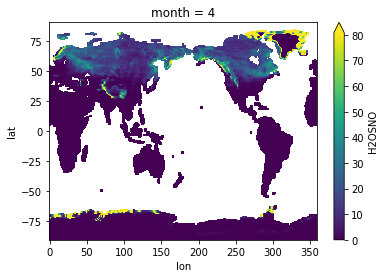

In [5]:
(swe_2pt0_mm.max('ensemble_member') - 
 swe_2pt0_mm.min('ensemble_member')).plot(robust=True)

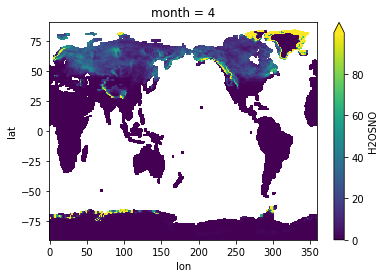

In [6]:
(swe_1pt5_mm.max('ensemble_member') - 
 swe_1pt5_mm.min('ensemble_member')).plot(robust=True)

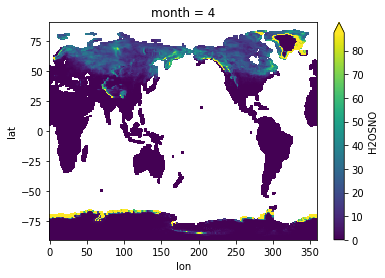

In [7]:
(swe_future_mm.max('ensemble_member') - 
 swe_future_mm.min('ensemble_member')).plot(robust=True)

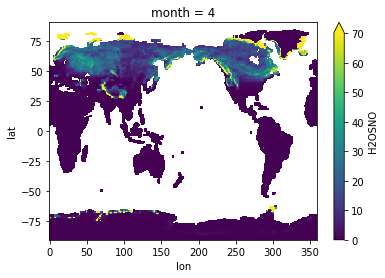

In [8]:
(swe_hist_mm.max('ensemble_member') - 
 swe_hist_mm.min('ensemble_member')).plot(robust=True)

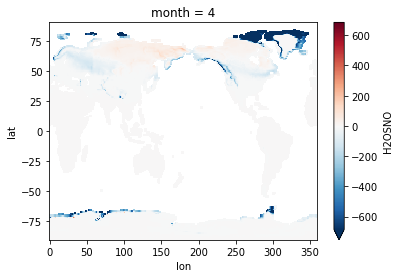

In [9]:
(swe_future_mm.mean('ensemble_member') - swe_hist_mm.mean('ensemble_member')).plot(robust=True)

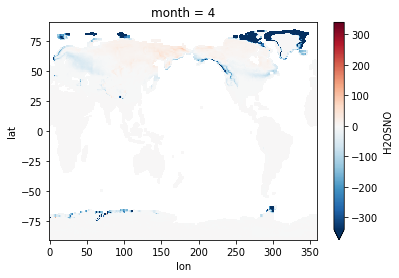

In [10]:
(swe_2pt0_mm.mean('ensemble_member') - swe_hist_mm.mean('ensemble_member')).plot(robust=True)

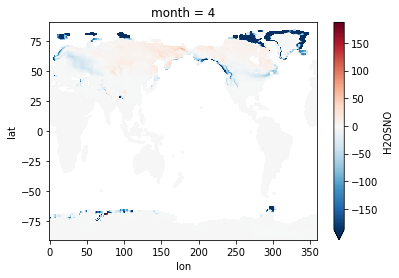

In [11]:
(swe_1pt5_mm.mean('ensemble_member') - swe_hist_mm.mean('ensemble_member')).plot(robust=True)

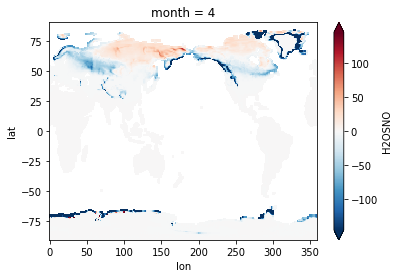

In [12]:
swe_lens_diff = swe_future_mm.mean('ensemble_member') - swe_hist_mm.mean('ensemble_member')
swe_2pt0_diff = swe_2pt0_mm.mean('ensemble_member') - swe_hist_mm.mean('ensemble_member')
(swe_lens_diff - swe_2pt0_diff).plot(robust=True)

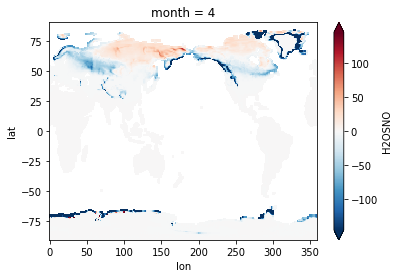

In [13]:
(swe_future_mm.mean('ensemble_member') - swe_2pt0_mm.mean('ensemble_member')).plot(robust=True)

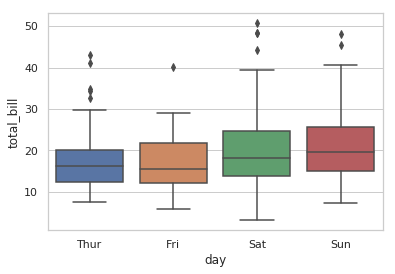

In [14]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
# ax = sns.boxplot(x=tips["total_bill"])

ax = sns.boxplot(x="day", y="total_bill", data=tips)

In [15]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [2]:
# import RASM land masks 
land_masks = xr.open_dataset(os.path.join('/p/home/gergel/data/RASM_land_masks', 
                                          'RASM_VICRVIC_GRID_MASKS_AND_METRICS.nc'))
land_masks_25km = xr.open_dataset(os.path.join('/p/home/gergel/data/RASM_land_masks', 
                                          'RASM_VICRVIC_GRID_MASKS_AND_METRICS_25km.nc'))

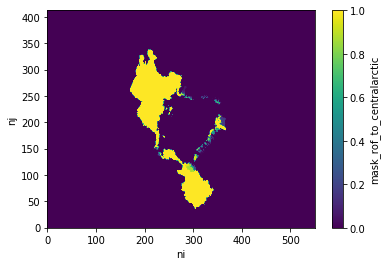

In [5]:
land_masks_25km['mask_rof_to_centralarctic'].plot()

In [4]:
land_masks.data_vars

Data variables:
    area                                               (nj, ni) float64 ...
    frac                                               (nj, ni) float64 ...
    mask                                               (nj, ni) int32 ...
    mask_active_atmosphere                             (nj, ni) float64 ...
    mask_active_land                                   (nj, ni) float64 ...
    mask_amur                                          (nj, ni) float64 ...
    mask_boreal_forests_taiga                          (nj, ni) float64 ...
    mask_deserts_and_xeric_shrublands                  (nj, ni) float64 ...
    mask_kolyma                                        (nj, ni) float64 ...
    mask_lena                                          (nj, ni) float64 ...
    mask_mackenzie                                     (nj, ni) float64 ...
    mask_nelson                                        (nj, ni) float64 ...
    mask_ob                                            (nj, ni) float64 ..